In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

# 운영 체제 확인
if platform.system() == 'Darwin':  # Mac
    print('apple gothic')
    font_name = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    font_name = 'NanumGothic'
else:
    font_name = None

# 한글 폰트 설정
if font_name:
    plt.rcParams['font.family'] = font_name

# 마이너스 부호 설정
plt.rcParams['axes.unicode_minus'] = False

apple gothic


# 데이터 수집 방법
- FinanceDataReader
- pykrx
- yfinance

### (1) FinanceDataReader
- 한국과 미국 등 국가별 주요지수
- 증권시장별 상장종목
- 종목코드, 시장, 종목명, 섹터, 산업군, 상장일, 결산월 등
- 상품 선물, 환율, 채권 수익률

In [2]:
# 설치
# pip install -U finance-datareader

In [ ]:
import FinanceDataReader as fdr

# Indexes
# 'KS11'(코스피지수), 'KQ11'(코스닥지수), 
# 'DJI'(다우존스지수), 'IXIC'(나스닥지수), 'US500'(S&P 500지수) 등

# Exchanges
# 'USD/KRX', 'USD/EUR', 'CNY/KRW' 등 (조합가능한 화폐별 환율 데이터 일자별)

sp500 = fdr.StockListing('S&P500')
sp500
 

In [52]:
# 삼성전자(005930)의 2023년도 주가 데이터
df = fdr.DataReader(symbol = '005930',
                    start = '20220101',
                    end = '20221231')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454


Text(0, 0.5, '주가')

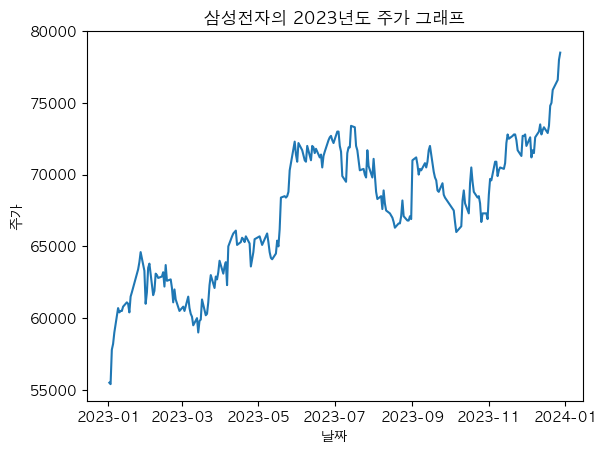

In [5]:
# 시각화
plt.figure()
plt.plot(df['Close'])

interval = 5000
maxlim = int((df['Close'].max() / interval) * interval)
plt.yticks(np.arange(df['Close'].min() - 400, maxlim + interval, interval))
plt.title('삼성전자의 2023년도 주가 그래프')
plt.xlabel('날짜')
plt.ylabel('주가')

In [58]:
# 코스피
kospi = fdr.DataReader(symbol = 'KS11',
                       start = '20220101',
                       end = '20221231')
kospi

1 001 2022-01-01 00:00:00 2023-12-31 00:00:00


,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2022-01-03,2998.32,3010.77,2979.42,2988.77,435825854,0.0037,1,11.12,8193887264228,2211373367405162
2022-01-04,2991.97,2995.25,2973.08,2989.24,621549385,0.0002,1,0.47,9991473942836,2212087919930193
2022-01-05,2984.05,2986.20,2936.73,2953.97,787346121,-0.0118,2,-35.27,15428422516445,2186715367040906
2022-01-06,2925.40,2952.54,2915.38,2920.53,786045066,-0.0113,2,-33.44,13297135242112,2162437324139180
2022-01-07,2933.78,2959.03,2933.10,2954.89,546172478,0.0118,1,34.36,10582421237357,2187560533655431
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,2325.86,2333.08,2311.90,2313.69,366988585,-0.0183,2,-43.04,5935798139102,1829395536163727
2022-12-26,2312.54,2321.92,2304.20,2317.14,427844636,0.0015,1,3.45,5205750204132,1831727639591539
2022-12-27,2327.52,2335.99,2321.48,2332.79,448498792,0.0068,1,15.65,7126994120167,1844141209320557


<Axes: xlabel='Date'>

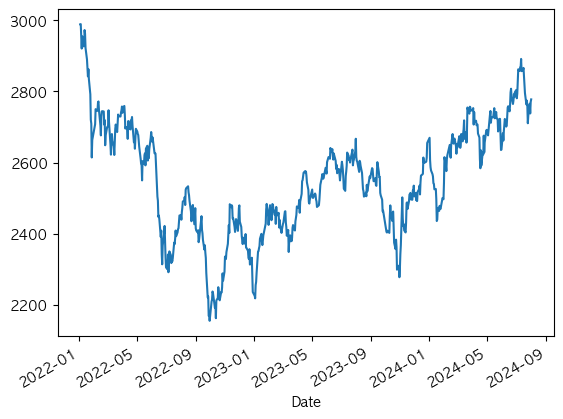

In [7]:
# 시각화
kospi['Close'].plot()

In [59]:
fdr.DataReader(symbol = 'AAPL',
               start = '20220101',
               end = '20221231'
               )

<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>  - symbol "AAPL" not found or invalid periods


""


### (2) pykrx
- KRX, Naver 등의 웹사이트에서 주가정보를 스크래핑하는 모듈
- 특정 시점의 상장 종목코드 조회 가능
- 해당 종목코드의 종목명을 조회하는 함수가 별도 존재

In [8]:
# pip install pykrx
from pykrx import stock

#### 2-1. 종목 코드 및 종목명

In [9]:
# get_market_ticker_list -> 주식 종목들을 가져오기
# get_market_ticker_name -> 심볼(티커)을 받으면 기업 이름을 가져오기

ticker_list = stock.get_market_ticker_list(date = '2023-12-31', market = 'ALL')
ticker_list[:5], len(ticker_list)

(['060310', '095570', '006840', '054620', '265520'], 2690)

In [10]:
# KOSPI 종목코드 조회
kospi_ticker = stock.get_market_ticker_list(date="20220101", market="KOSPI")
(kospi_ticker[:5], len(kospi_ticker))

(['095570', '006840', '027410', '282330', '138930'], 943)

In [11]:
# 종목명
stock_name = stock.get_market_ticker_name('005930')
stock_name

'삼성전자'

#### 2-2. OHLCV(시가, 고가, 저가, 종가, 거래량)

In [12]:
# get_market_ohlcv

# 삼성전자의 20220101~20220920의 주가데이터
df = stock.get_market_ohlcv_by_date(fromdate="20220101", 
                                    todate="20220920", 
                                    ticker="005930")
df

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.383142
2022-01-04,78800,79200,78300,78700,12427416,0.127226
2022-01-05,78800,79000,76400,77400,25470640,-1.651842
2022-01-06,76700,77600,76600,76900,12931954,-0.645995
2022-01-07,78100,78400,77400,78300,15163757,1.820546
...,...,...,...,...,...,...
2022-09-14,56200,57200,56100,56800,12524961,-2.237522
2022-09-15,57000,57100,56000,56000,11664819,-1.408451
2022-09-16,55600,56400,55500,56200,13456503,0.357143


In [13]:
# 일정 기간 종목의 가격 변동 조회
# get_market_price_change_by_ticker
df = stock.get_market_price_change_by_ticker(fromdate="20220801", 
                                             todate="20220920",
                                             market = 'KOSPI')
df.head()

,종목명,시가,종가,변동폭,등락률,거래량,거래대금
티커,,,,,,,
095570,AJ네트웍스,8030,7830,-200,-2.49,5463509,43102591480
006840,AK홀딩스,16350,15750,-600,-3.67,344494,5587561800
027410,BGF,4215,3900,-315,-7.47,4444087,18277872435
282330,BGF리테일,181000,164000,-17000,-9.39,1947992,322270114000
138930,BNK금융지주,6790,6610,-180,-2.65,34970261,234444930075


#### 2-3. 펀더멘탈 지표(PER, PBR, EPS, BPS, DIV, DPS)
- DIV(배당수익률): (주가배당금/주가) * 100
- BPS(주당순자산가치=청산가치): (순자산)/(총발행주식수)
- PER(주가수익비율): (주가)/(주당순이익)
- EPS(주당순이익): (당기순이익)/(총발행주식수)
- PBR(주가순자산비율): (주가)/(BPS) = PER*EPS / BPS

In [15]:
# 종목코드별 펀더멘탈 지표 조회
# stock.get_market_fundamental_by_ticker(date=날짜, market=거래소)

df = stock.get_market_fundamental_by_ticker(date = '2023-08-24', market = 'KOSPI')
df

,BPS,PER,PBR,EPS,DIV,DPS
티커,,,,,,
095570,8076,20.07,0.50,201,6.69,270
006840,41948,0.00,0.46,0,1.03,200
027410,16528,14.64,0.22,247,3.04,110
282330,55724,14.42,2.90,11203,2.54,4100
138930,30468,2.75,0.22,2404,9.44,625
...,...,...,...,...,...,...
079980,11585,0.00,0.81,0,0.00,0
005010,16181,0.85,0.30,5675,7.25,350
000540,11208,1.36,0.26,2142,0.00,0


In [16]:
# 일자별 개별종목 펀더멘탈 지표 조회
# get_market_fundamental_by_date(fromdate, todate, ticker, freq='d', name_display=False)

df = stock.get_market_fundamental_by_date(fromdate = '2020-01-01',
                                     todate = '2023-12-31',
                                     ticker = '005930')
df

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2020-01-02,35342,8.54,1.56,6461,2.57,1416
2020-01-03,35342,8.59,1.57,6461,2.55,1416
2020-01-06,35342,8.59,1.57,6461,2.55,1416
2020-01-07,35342,8.64,1.58,6461,2.54,1416
2020-01-08,35342,8.79,1.61,6461,2.49,1416
...,...,...,...,...,...,...
2023-12-21,57822,9.31,1.30,8057,1.93,1444
2023-12-22,57822,9.42,1.31,8057,1.90,1444
2023-12-26,57822,9.51,1.32,8057,1.89,1444


#### 2-4. 기관별 거래량

In [23]:
# get_market_trading_value_by_date (순매수)
df = stock.get_market_trading_value_by_date(fromdate = '20220101',
                                       todate = '20221231',
                                       ticker = '005930')
df

,기관합계,기타법인,개인,외국인합계,전체
날짜,,,,,
2022-01-03,-329791819300,4774451400,184943470500,140073897400,0
2022-01-04,-206326913300,1908886100,91958901300,112459125900,0
2022-01-05,-598003977100,-8062754100,649419857800,-43353126600,0
2022-01-06,-171750680700,3976748900,-3254631500,171028563300,0
2022-01-07,-165044032600,-3880739900,-171571901600,340496674100,0
...,...,...,...,...,...
2022-12-23,23550966200,-5667892400,3946153800,-21829227600,0
2022-12-26,145476007500,-10696338200,-72349420800,-62430248500,0
2022-12-27,267835843500,-19947770200,-158600094700,-89287978600,0


In [24]:
# 파라미터 'on' 설정으로 '매수' -> '매도' 변경
df = stock.get_market_trading_value_by_date("20210115", 
                                            "20210122", 
                                            "005930", 
                                            on='매도')
df

,기관합계,기타법인,개인,외국인합계,전체
날짜,,,,,
2021-01-15,1505250243300,19525756900,925426195700,525029741764,2975231937664
2021-01-18,1353223733500,22132983500,1883422627200,456996648400,3715775992600
2021-01-19,1205081446400,28155090000,1800734616800,407371601300,3441342754500
2021-01-20,1147190346800,10015618200,643413644500,405119540200,2205739149700
2021-01-21,878411497500,41184362100,851899126900,439714802000,2211209788500
2021-01-22,1218085354000,12679395000,813950599700,672919902820,2717635251520


#### 2-5. 외국인 보유수량

In [29]:
# get_exhaustion_rates_of_foreign_investment_by_ticker
#외국인 보유수량 및 한도소진율은 장개시 시점 기준(금융감독원 외국인투자 관리시스템 제공 전일자 확정치)

df = stock.get_exhaustion_rates_of_foreign_investment_by_ticker('20220707',
                                                                'KOSPI')
df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,상장주식수,보유수량,지분율,한도수량,한도소진률
티커,,,,,
000020,27931470,1402549,5.019531,27931470,5.019531
000040,96137631,43740259,45.500000,96137631,45.500000
000050,27415270,322145,1.179688,27415270,1.179688
000060,120625000,13352765,11.070312,120625000,11.070312
000070,8564271,647472,7.558594,8564271,7.558594
...,...,...,...,...,...
402340,141467571,57934102,40.937500,141467571,40.937500
404990,55955884,1045983,1.870117,55955884,1.870117
417310,40400000,399701,0.990234,40400000,0.990234


#### 2-6. 업종 구분

In [30]:
# get_index_name

for ticker in stock.get_index_ticker_list():
    print(ticker, stock.get_index_ticker_name(ticker))

1001 코스피
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물
1011 철강금속
1012 기계
1013 전기전자
1014 의료정밀
1015 운수장비
1016 유통업
1017 전기가스업
1018 건설업
1019 운수창고업
1020 통신업
1021 금융업
1024 증권
1025 보험
1026 서비스업
1027 제조업
1028 코스피 200
1034 코스피 100
1035 코스피 50
1150 코스피 200 커뮤니케이션서비스
1151 코스피 200 건설
1152 코스피 200 중공업
1153 코스피 200 철강/소재
1154 코스피 200 에너지/화학
1155 코스피 200 정보기술
1156 코스피 200 금융
1157 코스피 200 생활소비재
1158 코스피 200 경기소비재
1159 코스피 200 산업재
1160 코스피 200 헬스케어
1167 코스피 200 중소형주
1182 코스피 200 초대형제외 지수
1224 코스피 200 비중상한 30%
1227 코스피 200 비중상한 25%
1232 코스피 200 비중상한 20%
1244 코스피200제외 코스피지수
1894 코스피 200 TOP 10


In [32]:
# 업종 티커가 담고 있는 종목 티커 도출
# get_index_portfolio_deposit_file()

index_list = stock.get_index_portfolio_deposit_file('1018')
print(len(index_list), index_list)

29 ['000720', '051600', '006360', '047040', '294870', '375500', '009410', '475150', '001470', '126720', '097230', '039570', '028100', '003070', '002990', '013580', '002780', '005960', '034300', '014790', '002460', '010960', '004960', '013360', '001260', '013700', '023960', '002410', '010400']


In [34]:
# 업종 OHLCV 조회
# get_index_ohlcv_by_date()

df = stock.get_index_ohlcv_by_date(fromdate = "20210601",
                                   todate = "20221231", 
                                   ticker = "1013")
df

전기전자,시가,고가,저가,종가,거래량,거래대금,상장시가총액
날짜,,,,,,,
2021-06-01,30151.15,30467.26,30005.75,30284.60,285777706,3013130482590,772980858540865
2021-06-02,30295.93,30509.45,30182.44,30249.67,212243845,3143606016255,771959159314290
2021-06-03,30247.11,31043.57,30247.11,30950.05,491314111,5299110838627,789556340315780
2021-06-04,30940.13,30940.13,30505.70,30792.65,417575114,3886262981630,785857337881900
2021-06-07,30830.22,31041.46,30636.15,30773.79,390617690,3999876683313,785765035030195
...,...,...,...,...,...,...,...
2022-12-23,22266.08,22338.24,22139.79,22192.61,36247005,1320298244671,665336837617200
2022-12-26,22136.40,22212.11,22078.25,22138.71,26294430,958330677288,663579298069936
2022-12-27,22220.29,22305.72,22094.69,22196.02,34133859,1347303482743,665426275487962


In [38]:
# 인덱스 등락률 조회

# get_index_price_change_by_ticker()
# KRX / KOSPI / KOSDAQ 세 개의 지수 지원

df = stock.get_index_price_change_by_ticker(fromdate = "20220101", 
                                            todate = "20230101", 
                                            market = "KOSDAQ")
df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,시가,종가,등락률,거래량,거래대금
지수명,,,,,
코스닥,1033.98,679.29,-34.312500,254361405193,1697552064205847
코스닥 150,1524.21,957.78,-37.156250,14739956621,448533004426490
코스닥 글로벌,0.00,929.75,0.000000,320670250,14132105230803
코스닥 150 정보기술,928.05,567.10,-38.875000,3968842852,121542058745214
코스닥 150 헬스케어,3681.07,2261.58,-38.562500,3708502260,107553579741613
코스닥 150 커뮤니케이션서비스,4938.46,2541.61,-48.531250,1379939867,83650390535922
코스닥 150 소재,2665.77,1856.98,-30.343750,1238478275,42517080828060
코스닥 150 산업재,385.16,279.75,-27.375000,1210077440,48534821829664
코스닥 150 필수소비재,716.30,650.49,-9.187500,521850729,13725559141310


### (3) yfinance
- 가장 다양한 정보 확인 가능(배당정보, 분할정보, 재무정보 등)
- 단, 2000년 이후부터 조회 가능
- 코스피 종목에는 .KS, 코스닥 종목에는 .KQ 붙이기
- end에 설정한 일자의 전일자까지 조회 -> 종료일+1을 end에 설정

In [40]:
# !pip install yfinance --user
import yfinance as yf

In [45]:
ticker = yf.Ticker('005930.KS')
ticker.history(interval = '1d',
               start = '2021-01-01',
               end = '2022-03-24',
               actions = True,
               auto_adjust = True
)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04 00:00:00+09:00,75364.896178,78528.360956,74620.551525,77225.757812,38655276,0.0,0.0
2021-01-05 00:00:00+09:00,75923.142282,78063.132812,75923.142282,78063.132812,35335669,0.0,0.0
2021-01-06 00:00:00+09:00,77504.872139,78621.388905,76388.355374,76481.398438,42089013,0.0,0.0
2021-01-07 00:00:00+09:00,77039.667860,78342.270940,76946.624783,77132.710938,32644642,0.0,0.0
2021-01-08 00:00:00+09:00,77504.880912,83738.766892,77225.751689,82622.250000,59013307,0.0,0.0
...,...,...,...,...,...,...,...
2022-03-17 00:00:00+09:00,66698.687500,66698.687500,66698.687500,66698.687500,0,0.0,0.0
2022-03-18 00:00:00+09:00,66888.171610,67172.398968,66509.201799,66982.914062,14410038,0.0,0.0
2022-03-21 00:00:00+09:00,67172.401120,67267.143576,66224.976562,66224.976562,11169002,0.0,0.0


In [46]:
# 애플 주가 가져오기

aapl = yf.download(tickers = 'AAPL',
            start = '2021-01-01',
            end = '2021-12-31'
)
aapl

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,126.830078,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.398178,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.076103,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.309967,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.417404,105158200
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,173.830734,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,177.824463,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,176.798920,79144300


Text(0.5, 1.0, 'yfinance 애플 주가')

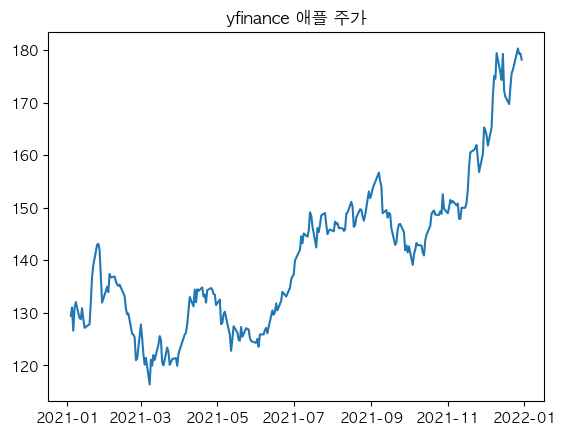

In [50]:
plt.figure()
plt.plot(aapl['Close'])
plt.title('yfinance 애플 주가')